<h1 style="text-align: center;"">Implementation of a classification tree using ID3(Iterative dichotomiser)</h1>

<h3>About Iterative dichotomiser</h3>
<P> The <b>Iterative dichotomiser algorithm</b> is a decision tree algorithm used for classification. The steps in Id3 include selecting
attributes on the basis of <b>information gain</b> function calculated on the basis of entorpy using probability of success or failure or the attribute specified. This notebook guides throught the steps to achieve the Id3 classification using python code. To study more theoritically about Id3 <a href='https://www.researchgate.net/publication/341884258_Iterative_Dichotomizer_3_ID3_Decision_Tree_A_Machine_Learning_Algorithm_for_Data_Classification_and_Predictive_Analysis'>Read this reasearch paper</a></P>

<h3><b>Requirements</h3>
<h4><b>This model uses the following libraries:</h4>
<p><i>numpy, pandas, graphviz </i> and <i>collections</i> please do ensure that the above dependencies are installed in your local machine<br>

In [27]:
import numpy as np
import pandas as pd
from graphviz import Digraph
from IPython.display import Image
from collections import deque


In [28]:
def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    prob = counts / counts.sum()
    return -np.sum(prob * np.log2(prob))

In [29]:
def information_gain(df, feature, target):
    total_entropy = entropy(df[target])
    values, counts = np.unique(df[feature], return_counts=True)

    weighted_entropy = sum(
        (counts[i] / sum(counts)) * entropy(df[df[feature] == values[i]][target])
        for i in range(len(values))
    )

    return total_entropy - weighted_entropy

In [30]:
def find_best_attribute(df, target):
    attributes = df.columns[:-1]  # Exclude target column
    return max(attributes, key=lambda attr: information_gain(df, attr, target))

In [31]:
def get_subtable(df, node, value):
    return df[df[node] == value].drop(columns=[node])

In [32]:
def build_tree(df, tree=None):
    target = df.keys()[-1]  # Target column
    node = find_best_attribute(df, target)
    values = np.unique(df[node])

    if tree is None:
        tree = {}
        tree[node] = {}

    for value in values:
        subtable = get_subtable(df, node, value)
        unique_targets, counts = np.unique(subtable[target], return_counts=True)

        if len(counts) == 1:  # If pure, stop recursion
            tree[node][value] = unique_targets[0]
        else:
            tree[node][value] = build_tree(subtable)

    return tree

In [45]:

def plot_tree_bfs(tree):
    graph = Digraph(format='png')
    graph.attr('node', shape='rect', style='filled', color='#D4AF37', fontcolor='black')  # Blue nodes

    queue = deque([(None, None, tree)])  # (Parent, Edge Label, Subtree)

    while queue:
        parent, edge_label, subtree = queue.popleft()

        for key in subtree.keys():
            graph.node(key, key)  # Create node

            if parent is not None:
                graph.edge(parent, key, label=edge_label)

            for value, child in subtree[key].items():
                if isinstance(child, dict):  # Internal node
                    queue.append((key, value, child))
                else:  # Leaf node
                    leaf_label = str(child)
                    graph.node(leaf_label, leaf_label, shape='ellipse', color='#D4AF37', fontcolor='black')  # Blue leaves
                    graph.edge(key, leaf_label, label=value)

    return graph

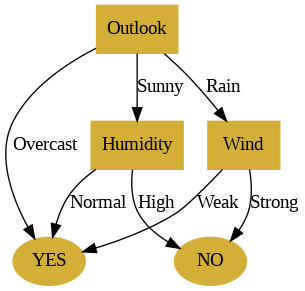

In [46]:
data = {
    'Outlook':    ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Humidity':   ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind':       ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO']
}

df = pd.DataFrame(data)

# Build decision tree
tree = build_tree(df)

# Generate and display the decision tree visualization (BFS)
graph = plot_tree_bfs(tree)
graph.render('/content/decision_tree')  # Save as PNG
Image(filename='/content/decision_tree.png')